In [ ]:
import math
# Vertex object
class Vertex:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def equals(self, vertex):
        return self.x == vertex.x and self.y == vertex.y

# Edge object
class Edge:
    def __init__(self, v0, v1):
        # The two vertices that make up the starting and ending vertex of the edge
        self.v0 = v0
        self.v1 = v1

    # Comparison function to compare this edge to another
    def equals(self, edge):
        return (self.v0.equals(edge.v0) and self.v1.equals(edge.v1)) or \
            (self.v0.equals(edge.v1) and self.v1.equals(edge.v0))

class Triangle:
    def __init__(self, v0, v1, v2):
        self.v0 = v0
        self.v1 = v1
        self.v2 = v2
        self.circumCirc = self.calcCircumCirc(v0, v1, v2)

    def calcCircumCirc(self, v0, v1, v2):
        ax = v0.x
        ay = v0.y
        bx = v1.x
        by = v1.y
        cx = v2.x
        cy = v2.y

        d = 2 * (ax * (by - cy) + bx * (cy - ay) + cx * (ay - by))
        ux = ((ax**2 + ay**2) * (by - cy) + (bx**2 + by**2) * (cy - ay) + (cx**2 + cy**2) * (ay - by)) / d
        uy = ((ax**2 + ay**2) * (cx - bx) + (bx**2 + by**2) * (ax - cx) + (cx**2 + cy**2) * (bx - ax)) / d

        r = math.sqrt((ax - ux)**2 + (ay - uy)**2)
        return {'c': Vertex(ux, uy), 'r': r}

    def inCircumcircle(self, v):
        dx = self.circumCirc['c'].x - v.x
        dy = self.circumCirc['c'].y - v.y
        print("c",dx,dy)
        print("r",self.circumCirc['r'])

        return math.sqrt(dx * dx + dy * dy) <= self.circumCirc['r']

def superTriangle(vertices):
    #print("vertices",vertices)
    minx, miny, maxx, maxy = float('inf'), float('inf'), float('-inf'), float('-inf')
    for vertex in vertices:

        minx = min(minx, vertex[0])
        miny = min(minx, vertex[1])
        maxx = max(maxx, vertex[0])
        maxy = max(maxx, vertex[1])

    dx = (maxx - minx) * 10
    dy = (maxy - miny) * 10

    v0 = Vertex(minx - dx, miny - dy * 3)
    v1 = Vertex(minx - dx, maxy + dy)
    v2 = Vertex(maxx + dx * 3, maxy + dy)
    print("v0, v1, v2",v0.x, v0.y)
    print("v0, v1, v2",v1.x, v1.y)
    print("v0, v1, v2",v2.x, v2.y)
    return Triangle(v0, v1, v2)


# Update list of triangles by adding a new vertex
def addVertex(vertex, triangles):
    #print("vertex",vertex)
    vert1 = Vertex(vertex[0], vertex[1])
    #print("vert1",vert1)
    edges = []

    # Remove triangles with circumcircles containing the vertex
   # triangles = [triangle for triangle in triangles ]
    #printTriangles(triangles)
    for triangle in triangles:
      if not triangle.inCircumcircle(vert1):
        print("not in circumcircle")
        edges.append(Edge(triangle.v0, triangle.v1))
        edges.append(Edge(triangle.v1, triangle.v2))
        edges.append(Edge(triangle.v2, triangle.v0))

    # Get unique edges
    edges = uniqueEdges(edges)
    print("edges",edges)
    # Create new triangles from the unique edges and new vertex
    for edge in edges:
        triangles.append(Triangle(edge.v0, edge.v1, vertex))

    return triangles

def triangulate(vertices):
    # Create bounding 'super' triangle
    st = superTriangle(vertices)
    print("st",st)
    # Initialize triangles while adding bounding triangle
    triangles = [st]
    printTriangles(triangles)

    # Triangulate each vertex
    for vertex in vertices:
        print("vertex",vertex)
        triangles = addVertex(vertex, triangles)

    # Remove triangles that share edges with super triangle
    triangles = [triangle for triangle in triangles if not (
        triangle.v0 == st.v0 or triangle.v0 == st.v1 or triangle.v0 == st.v2 or
        triangle.v1 == st.v0 or triangle.v1 == st.v1 or triangle.v1 == st.v2 or
        triangle.v2 == st.v0 or triangle.v2 == st.v1 or triangle.v2 == st.v2
    )]

    return triangles

def printTriangles(triangles):
  for triangle in triangles:
    print("v0",triangle.v0.x,triangle.v0.y)
    print("v1",triangle.v1.x,triangle.v1.y)
    print("v2",triangle.v2.x,triangle.v2.y)

# Remove duplicate edges
def uniqueEdges(edges):
    unique_edges = []
    for i in range(len(edges)):
        is_unique = True

        # See if edge is unique
        for j in range(len(edges)):
            if i != j and edges[i].equals(edges[j]):
                is_unique = False
                break

        # Edge is unique, add to unique edges list
        if is_unique:
            unique_edges.append(edges[i])

    return unique_edges

import random
import math
import numpy as np
def main():
    pointList = []
    pointList2 = []
    for n in range(300):
        r = 2 * math.sqrt(random.random())
        theta = random.random() * 2 * math.pi
        pad = 0
        w = 10
        randX = random.uniform(pad, w - pad)
        randY = random.uniform(pad, w - pad)

        pointList.append(
            (randX, randY)
        )
        pointList2.append(
            (randX, randY)
        )
    xyPoints = [np.asarray([0,0]),np.asarray([0,1]),np.asarray([1,0]),np.asarray([1,1]), np.asarray([0,2]), np.asarray([2,0])]
    np.asarray(xyPoints)

    print("pointList",xyPoints)
    triangles = triangulate(xyPoints)
    print(triangles)


main()


pointList [array([0, 0]), array([0, 1]), array([1, 0]), array([1, 1]), array([0, 2]), array([2, 0])]
v0, v1, v2 -20 -60
v0, v1, v2 -20 22
v0, v1, v2 62 22
st <__main__.Triangle object at 0x7f664c1056c0>
v0 -20 -60
v1 -20 22
v2 62 22
vertex [0 0]
c 21.0 -19.0
r 57.982756057296896
edges []
vertex [0 1]
c 21.0 -20.0
r 57.982756057296896
edges []
vertex [1 0]
c 20.0 -19.0
r 57.982756057296896
edges []
vertex [1 1]
c 20.0 -20.0
r 57.982756057296896
edges []
vertex [0 2]
c 21.0 -21.0
r 57.982756057296896
edges []
vertex [2 0]
c 19.0 -19.0
r 57.982756057296896
edges []
[]


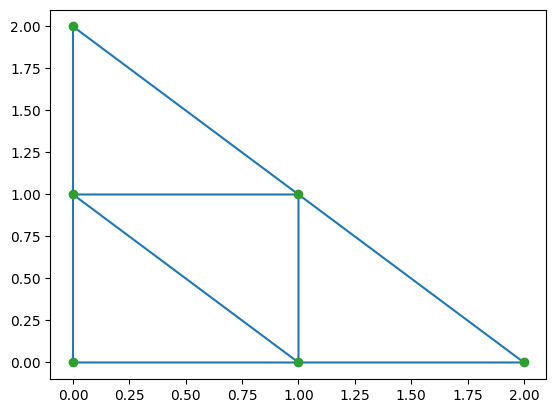

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_triangles(points, triangles):
    # Convert points to a NumPy array
    points = np.array(points)

    # Plot points
    plt.scatter(points[:, 0], points[:, 1], color='blue')

    # Plot triangles
    for triangle in triangles:
        x = [points[triangle[i], 0] for i in range(3)]
        y = [points[triangle[i], 1] for i in range(3)]
        plt.plot(x + [x[0]], y + [y[0]], color='black')

    plt.show()

from scipy.spatial import Delaunay

points = [[0, 0], [0, 1], [1, 0], [1, 1], [0, 2], [2, 0]]
tri = Delaunay(points)

#plot_triangles(points,tri)
# Plot the points and the triangles
points = np.array(points)
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [ ]:
def bowyer_watson(points):
    # add four outer points to make a triangle as convex hull
    hull = Delaunay(np.vstack([points, [[-1,-1], [-1,3], [3,-1], [3,3]]]))
    triangles = hull.simplices

    # remove triangles with the outer points
    #triangles = [triangle for triangle in triangles if -1 not in triangle and 3 not in triangle]

    for i, point in enumerate(points):
        # find all triangles with the new point
        containing_triangles = [triangle for triangle in triangles if i in triangle]

        # find the boundary of the polygon forming the triangles
        boundary_edges = set()
        for triangle in containing_triangles:
            for edge in [(triangle[0], triangle[1]), (triangle[1], triangle[2]), (triangle[2], triangle[0])]:
                if edge[0] > edge[1]:
                    edge = (edge[1], edge[0])
                if edge in boundary_edges:
                    boundary_edges.remove(edge)
                else:
                    boundary_edges.add(edge)

        # remove triangles with the new point
        newtriangles=[]
        for triangle in triangles:
            if triangle not in containing_triangles:
              newtriangles.append(triangle)

        triangles=newtriangles
        # add new triangles formed by connecting the new point to each edge of the boundary
        for edge in boundary_edges:
            triangles.append([edge[0], edge[1], i])

    # remove any triangles that contain the outer points
    triangles = [triangle for triangle in triangles if -1 not in triangle and 3 not in triangle]

    return hull.points, triangles

In [ ]:
points = [[0, 0], [0, 1], [1, 0], [1, 1], [0, 2], [2, 0]]
pts, tri = bowyer_watson(points)

#plot_triangles(points,tri)
# Plot the points and the triangles
points = np.array(points)
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

ValueError: ignored

numPts 10


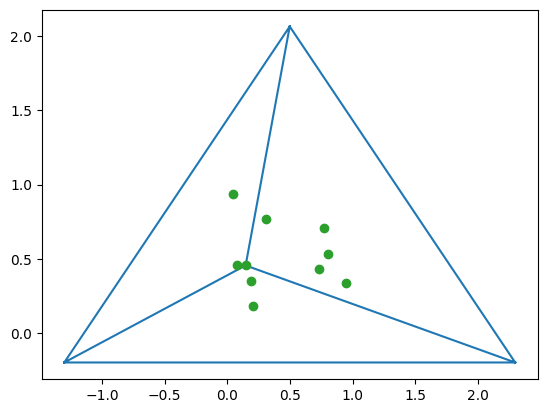

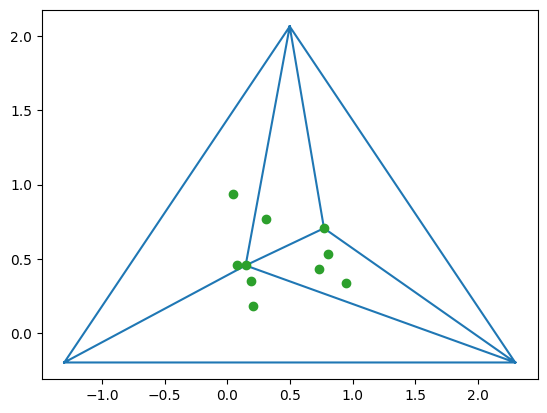

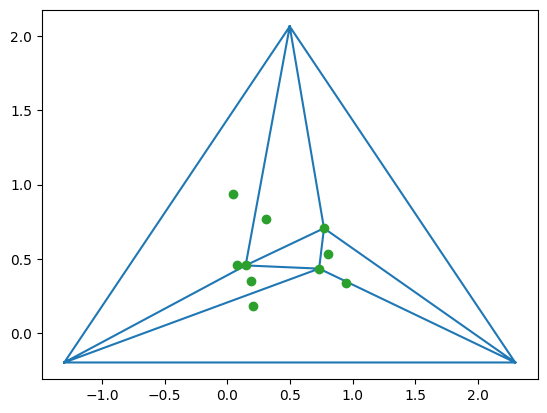

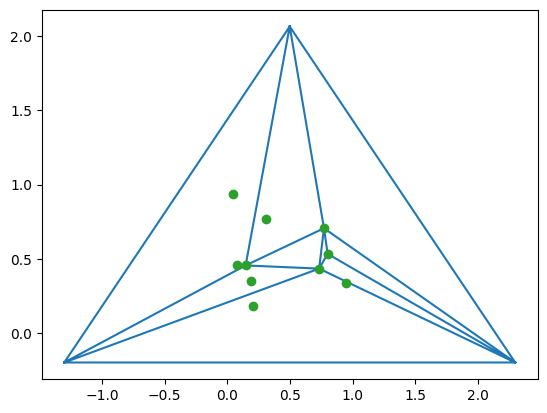

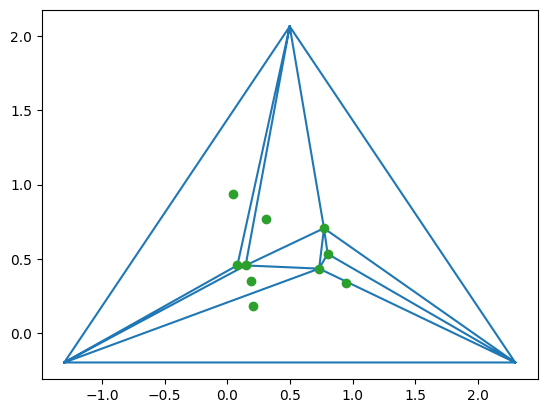

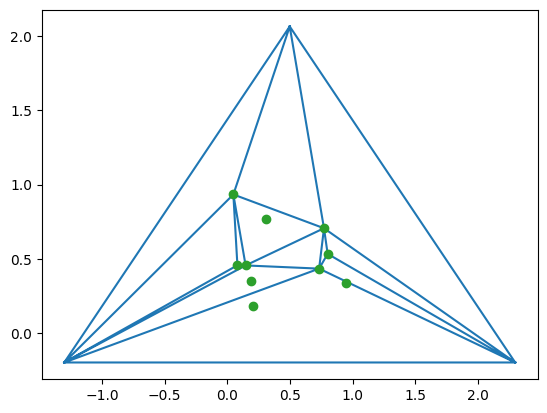

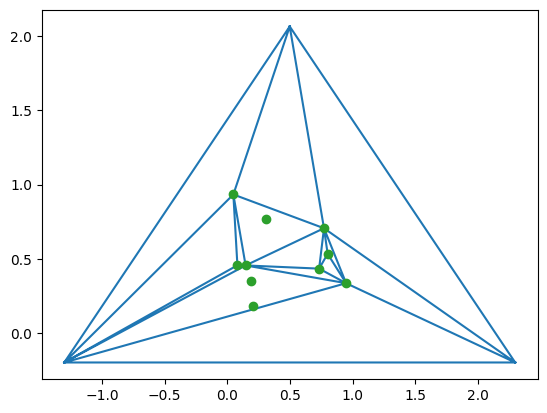

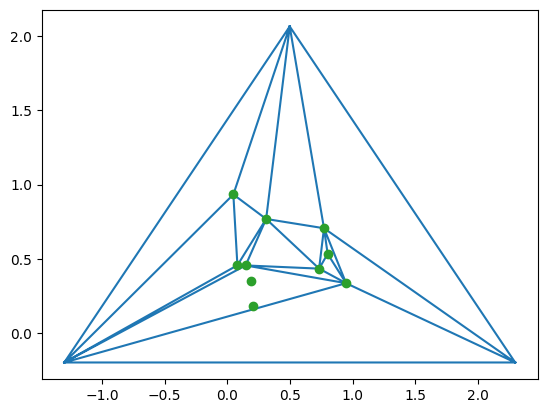

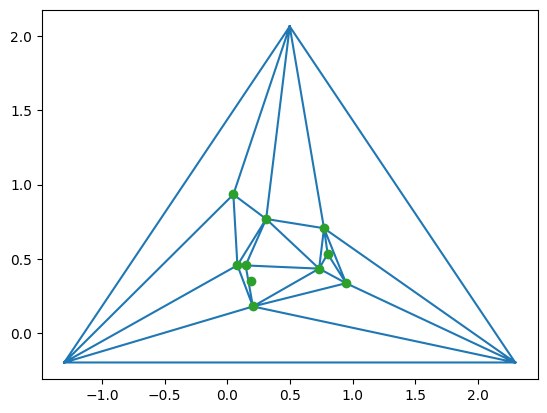

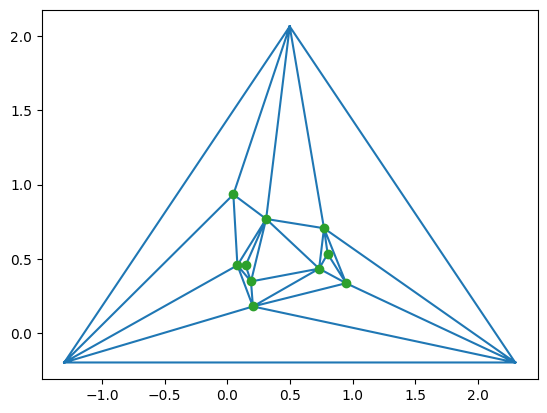

numPts 6


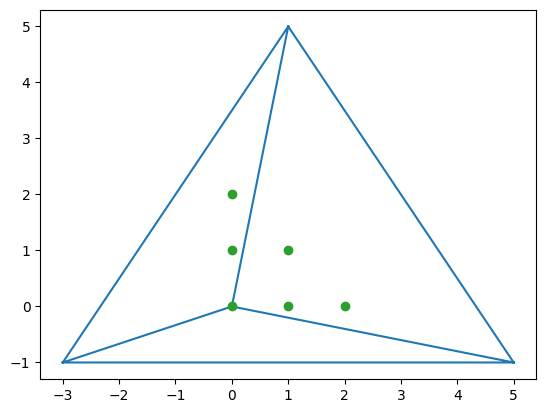

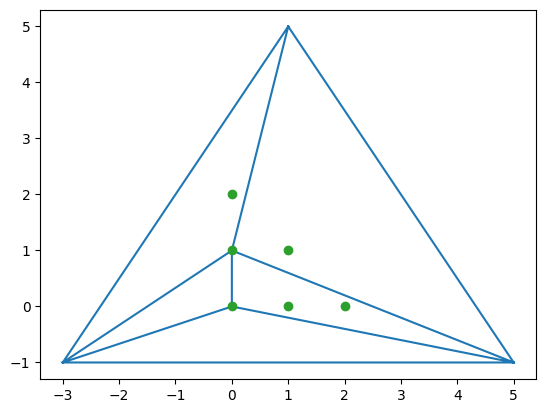

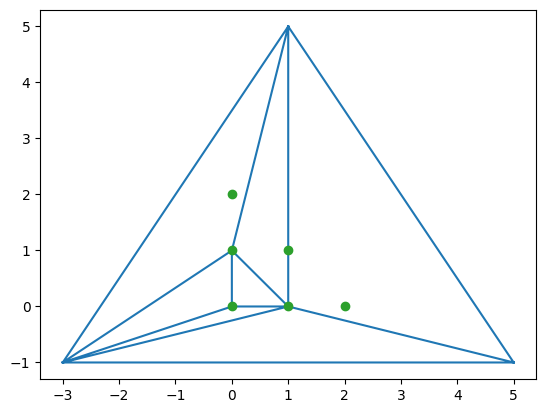

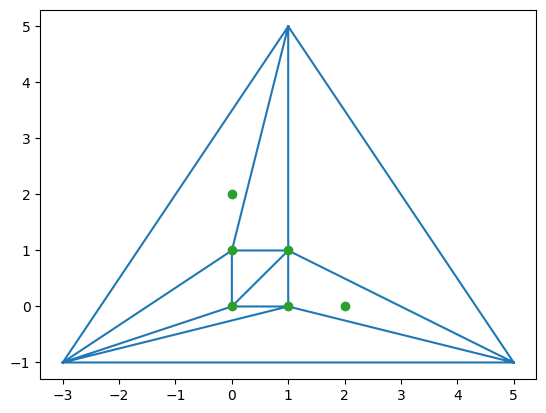

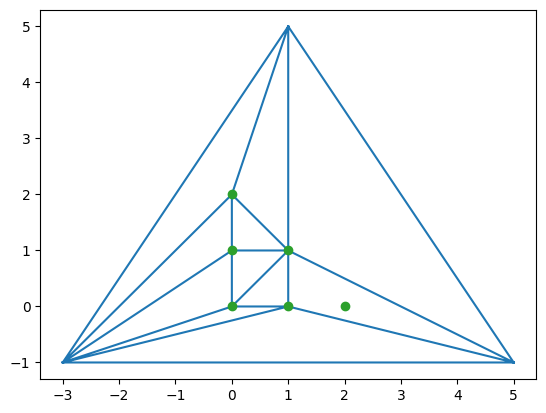

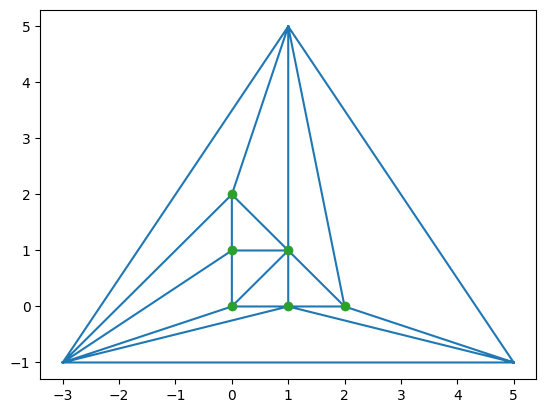

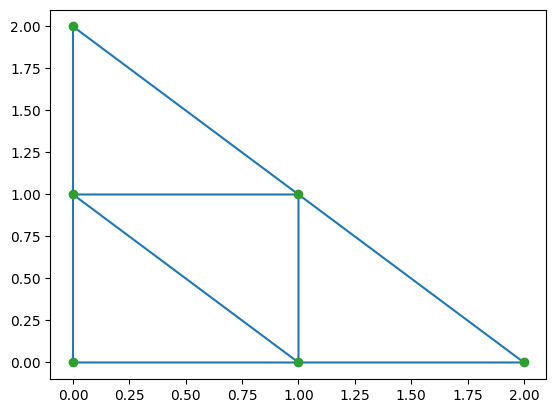

In [ ]:
# Define data structures like points and boundary edges.
# Sort the points by x-coordinate.
# Constructs the lower and upper hulls of the points.
# Removes duplicate edges from the hull.
# Check if no other point is inside the circumcircle of the triangle formed by that edge, for every edge and
# Create the triangulation.


##Method 1
#Implementation of Bowyer Watson algorithm

#It is a incremental algortihm as it adds one point at a time updating the triangulation.
#An incremental method is implemented instead of the circumcircle method

import numpy as np
import random
import matplotlib.pyplot as plt

EPS = 1.0e-14
# Define data structures
#points = points[:] # copy
points = [] # copy
triangles = [] # cells
edge2Triangles = {} # edge to triangle(s) map
boundaryEdges = set()
appliedBoundaryEdges = None
holes = None

# compute center of gravity
def GetCenterOfGravity(points):
    cg = np.zeros((2,), np.float64)
    for pt in points:
        cg += pt
    cg /= len(points)
    return cg

# sort
def distanceSquare(pt,cg):
    d = pt - cg
    return np.dot(d, d)
    #points.sort(key = distanceSquare)



def delaunay_triangulation(points):
    print("numPts",len(points))
    # Add a supertriangle that contains all the points
    supertriangle = get_supertriangle(points)
    triangulation = [supertriangle]

    # Iterate over each input point and add it to the triangulation
    countPoint=0
    for point in points:
        # Find the containing triangle for the point
        containing_triangle = find_containing_triangle(point, triangulation)

        # If the point is outside the convex hull, skip it
        if containing_triangle is None:
            continue

        vertex1, vertex2, vertex3 = containing_triangle# Plot the triangle
        # plt.plot([vertex1[0], vertex2[0]], [vertex1[1], vertex2[1]], 'k-')
        # plt.plot([vertex2[0], vertex3[0]], [vertex2[1], vertex3[1]], 'k-')
        # plt.plot([vertex3[0], vertex1[0]], [vertex3[1], vertex1[1]], 'k-')
        # plt.show()

        # Create a new triangle by connecting the point to the vertices of the containing triangle
        new_triangle = (vertex1, vertex2, tuple(point))
        triangulation.append(new_triangle)

        # Plot the points and triangles
        plotxyPoints=np.asarray(points)
        fig, ax = plt.subplots()
        plt.triplot(*zip(*sum(triangulation, ())))
        ax.plot(plotxyPoints[:,0], plotxyPoints[:,1], 'o')
        plt.show()

        count=0
        countPoint+=1

        # Check if the new triangle intersects any other triangles
        to_check = [(vertex1, vertex2), (vertex2, vertex3), (vertex3, vertex1)]
        while to_check:
            edge = to_check.pop()
            for triangle in triangulation:
                count=count+1
                if triangle_has_edge(triangle, edge):
                    # If the edge is shared with another triangle, check if the new triangle intersects it
                    if triangles_intersect(triangle, new_triangle):
                        # If the new triangle does not intersect the existing triangle, add it to the set of Delaunay triangles
                        triangulation.remove(triangle)
                        to_check.extend([(triangle[i], triangle[(i+1)%3]) for i in range(3)])
                    break
            else:
                # If the edge is not shared with any other triangles, add it to the set of boundary edges
                boundaryEdges.add(edge)

    # Remove the supertriangle and any triangles that contain a vertex of the supertriangle
    triangles = remove_supertriangle(triangulation, supertriangle)

    # Remove any duplicate edges from the boundary
    boundary = remove_duplicate_edges(boundaryEdges)

    return triangles

def get_supertriangle(points):
    x_coords, y_coords = zip(*points)
    min_x, min_y = min(x_coords), min(y_coords)
    max_x, max_y = max(x_coords), max(y_coords)
    dx = max_x - min_x
    dy = max_y - min_y
    mid_x, mid_y = (min_x + max_x) / 2, (min_y + max_y) / 2
    return ((mid_x - 2*dx, mid_y - dy),
            (mid_x, mid_y + 2*dy),
            (mid_x + 2*dx, mid_y - dy))



def find_containing_triangle(point, triangulation):
    for triangle in triangulation:
        if point_in_triangle(point, triangle):
            return triangle

def calculate_circumcircle(triangle):
    (x1, y1), (x2, y2), (x3, y3) = triangle
    D = 2 * (x1*(y2-y3) + x2*(y3-y1) + x3*(y1-y2))
    x = ((x1**2 + y1**2)*(y2-y3) + (x2**2 + y2**2)*(y3-y1) + (x3**2 + y3**2)*(y1-y2)) / D
    y = ((x1**2 + y1**2)*(x3-x2) + (x2**2 + y2**2)*(x1-x3) + (x3**2 + y3**2)*(x2-x1)) / D
    radius = ((x1-x)**2 + (y1-y)**2)**0.5
    return (x, y), radius

def point_in_circumcircle(center,radius,triangle):
    x, y = center
    (x1, y1), (x2, y2), (x3, y3) = triangle
    dx1, dy1 = x1 - x, y1 - y
    dx2, dy2 = x2 - x, y2 - y
    dx3, dy3 = x3 - x, y3 - y
    a = dx1**2 + dy1**2
    b = dx2**2 + dy2**2
    c = dx3**2 + dy3**2
    determinant = (x1*(y2-y3) + x2*(y3-y1) + x3*(y1-y2))**2
    return determinant > 0 and ((a*b*c)/(a*b + a*c + b*c)) < radius**2


    # Check if a triangle has an edge
def triangle_has_edge(triangle, edge):
    for i in range(3):
        if (triangle[i], triangle[(i+1)%3]) == edge or (triangle[(i+1)%3], triangle[i]) == edge:
            return True
    return False


def point_in_triangle(point, triangle):
    x1, y1 = triangle[0]
    x2, y2 = triangle[1]
    x3, y3 = triangle[2]
    x, y = point

    # Compute barycentric coordinates
    denom = (y2 - y3) * (x1 - x3) + (x3 - x2) * (y1 - y3)
    b1 = ((y2 - y3) * (x - x3) + (x3 - x2) * (y - y3)) / denom
    b2 = ((y3 - y1) * (x - x3) + (x1 - x3) * (y - y3)) / denom
    b3 = 1 - b1 - b2

    # Check if point is inside triangle
    return 0 <= b1 <= 1 and 0 <= b2 <= 1 and 0 <= b3 <= 1


def remove_duplicate_edges(edges):
     return list(set([tuple(sorted(e)) for e in edges]))


def make_counterclockwise(triangle):
    A, B, C = np.array(triangle)
    AB = B - A
    AC = C - A
    cross = np.cross(AB, AC)
    if cross < 0:
        return [A, C, B]
    else:
        return triangle

def triangles_intersect(triangle1, triangle2):
    # Plot the points and triangles
    #fig, ax = plt.subplots()
    # print("triangle1")
    # plt.triplot(*zip(*sum([triangle1], ())))
    # plt.show()
    # print("triangle2")
    # plt.triplot(*zip(*sum([triangle2], ())))
    # plt.show()
    # Convert tuples to numpy arrays
    triangle1=make_counterclockwise(triangle1)
    triangle2=make_counterclockwise(triangle2)
    A1, B1, C1 = np.array(triangle1)
    A2, B2, C2 = np.array(triangle2)

    A1 = np.append(A1, 0)
    A2 = np.append(A2, 0)
    B1 = np.append(B1, 0)
    B2 = np.append(B2, 0)
    C1 = np.append(C1, 0)
    C2 = np.append(C2, 0)
    # Compute the normal vectors of the planes of each triangle
    normal1 = np.cross(B1 - A1, C1 - A1)
    normal2 = np.cross(B2 - A2, C2 - A2)

    # Check if the triangles are parallel
    if np.allclose(normal1, np.zeros(3)) or np.allclose(normal2, np.zeros(3)):
        return False

    # Ensure the normal vectors are pointing outward
    if np.dot(normal1, A1 - A2) < 0:
        normal1 = -normal1
    if np.dot(normal2, A2 - A1) < 0:
        normal2 = -normal2

    # Compute the direction of the intersection line
    direction = np.cross(normal1, normal2)

    # Compute the intersection of the planes of the two triangles
    if np.allclose(direction, np.zeros(3)):
        return False
    x1, y1, z1 = A1
    x2, y2, z2 = A2
    t = np.dot(normal2, A2 - A1) / np.dot(normal1, normal2)
    intersection = np.array([x1, y1, z1]) + t * normal1

    # Check if the intersection point is inside both triangles
    if point_in_triangle(intersection, triangle1) and point_in_triangle(intersection, triangle2):
        return True
    else:
        return False


def remove_supertriangle(triangulation, supertriangle):
    # new_triangulation = []
    # print("supertriangle",supertriangle)
    # for triangle in triangulation:
    #   print("Newtriangle",triangle)
    #   # Check if any vertex of the triangle is in the supertriangle
    #   foundflag=False
    #   for vertex in supertriangle:
    #     print("supertrianglevertex",vertex)
    #     if vertex in triangle:
    #         found = True
    #         print("vertex",vertex)
    #         print("found")
    #         break
    #   if not found:
    #       new_triangulation.append(triangle)
    # # Remove any triangles that contain a vertex of the supertriangle
    triangles = [triangle for triangle in triangulation if not any(vertex in supertriangle for vertex in triangle)]

    return triangles

def plot_triangles(points, triangles):
    # Convert points to a NumPy array
    points = np.array(points)

    # Plot points
    plt.scatter(points[:, 0], points[:, 1], color='blue')

    # Plot triangles
    for triangle in triangles:
        x = [points[triangle[i], 0] for i in range(3)]
        y = [points[triangle[i], 1] for i in range(3)]
        plt.plot(x + [x[0]], y + [y[0]], color='black')

    plt.show()

random.seed(100)
xyPoints = [np.array([random.random(), random.random()]) for i in range(10)]
delaunay = delaunay_triangulation(xyPoints)
#plot_triangles(xyPoints,delaunay)

#For comparing the algorithm with other methods
xyPoints = [np.asarray([0,0]),np.asarray([0,1]),np.asarray([1,0]),np.asarray([1,1]), np.asarray([0,2]), np.asarray([2,0])]
np.asarray(xyPoints)

delaunay_triangulation(xyPoints)


##Method 2
## Using the inbuilt Delaunay function

from scipy.spatial import Delaunay

points = [[0, 0], [0, 1], [1, 0], [1, 1], [0, 2], [2, 0]]
tri = Delaunay(points)

# Plot the points and the triangles
points = np.array(points)
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()